<a href="https://colab.research.google.com/github/ManuelGDS/Simulacion-1/blob/main/MC_y_AciertoyErrorsqrt(arctan(x)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **González de Santiago José Manuel**


In [8]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

# **Grafica de la funcion** $\sqrt{\arctan(x)}$

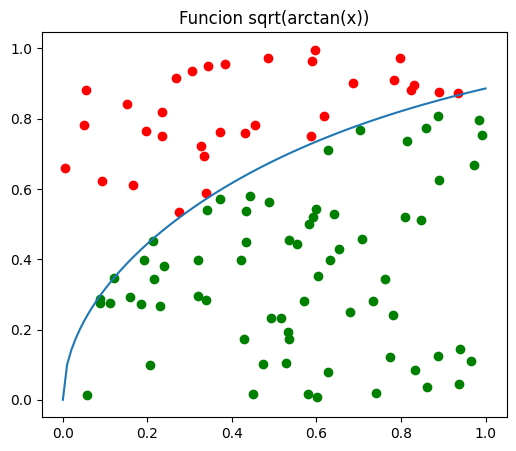

In [ ]:
xi = np.linspace(0,1,100)
plt.figure(figsize=(6,5))
plt.plot(xi, np.sqrt(np.arctan(xi)))


for i in range(100):
  u1 = rnd.random()
  u2 = rnd.random()
  if u2 <= np.sqrt(np.arctan(u1)):
    plt.scatter(u1,u2, color = "g")
  else:
    plt.scatter(u1,u2, color= "r")
plt.title(label = "Funcion sqrt(arctan(x))")
plt.show()

# **Media Muestral**

In [ ]:
n = 1000

In [ ]:
#Funcion para el caLculo de las g(x_i)
def estimacionmm(n):
  a = 0 #limite inferior
  b =  1 #limite superior
  listag = [] #En esta lista se iran anexando los valores de g(x_i)
  #listau = ["lista_u"] #esta linea era para indexar los numeros aleatorios generados
  #listax = ["lista_x"] #esta linea era para anexar los numeros de la operacion a+u(b-a)
  for i in range(n):
    u = rnd.random()
    x = a + u*(b-a)
    g = np.sqrt(np.arctan(x)) #Aqui esta la evaluaion de la funcion con la x
    listag.append(g)
    #listau.append(u)
    #listax.append(x)
  return listag #, listax, listau

En la siguiente función se lleva a cabo la operacion
$\sum_{n=1}^ng(x_i)$ = es decir $g(x_1)+g(x_2)+...+g(x_n)$

In [ ]:
#Esta función es para la suma de la de los g(x_i)
def sum_g():
  G = estimacionmm(n) #Aqui llamamos a nuestra primer funcion que es las g(xi)
  variablegi = 0
  listagi = []
  for variable in G:
    variablegi += variable #Aqui vamos sumandole el valor de los g(x_i)
    listagi.append(variablegi)
  return listagi    #Nos regresa una lista con los valores g(x_i) hasta n

A continuacion se hace la siguiente operación

$I=\frac{1}{n}(g(x_1)+...+g(x_n))$

In [ ]:
def calculoI(n):
  Gi = sum_g() #Aqui llamamos a nuestra funcion que suma los g(x_i)
  lista_i = []
  for elemento in Gi:
    i_suma = (1/n)*(elemento)
    lista_i.append(i_suma)
  return lista_i[-1] #Esto es para que me regrese el ultimo valor de n iteraciones

In [ ]:
def simulacion(M): #Aqui esta funcion para n experimentos con m iuteraciones
  r = []
  for i in range(M):
    R = calculoI(n)
    r.append(R)
  return r

In [ ]:
S = simulacion(1000)

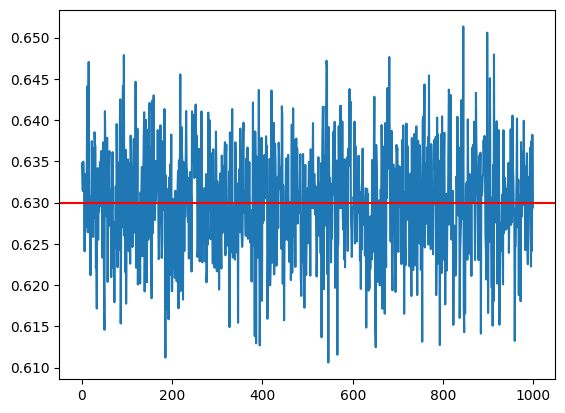

In [ ]:
plt.plot(S)
plt.axhline(y = np.mean(S), color='r', linestyle='-')

(array([ 2.,  1.,  4.,  4.,  3.,  8.,  4.,  6.,  7.,  8., 13., 15., 13.,
        20., 34., 26., 35., 38., 45., 42., 42., 50., 34., 52., 48., 46.,
        52., 40., 35., 47., 35., 28., 40., 24., 16., 24., 12., 10., 10.,
         6.,  6.,  4.,  3.,  1.,  2.,  3.,  0.,  0.,  0.,  2.]),
 array([0.61061129, 0.61142589, 0.6122405 , 0.61305511, 0.61386971,
        0.61468432, 0.61549893, 0.61631353, 0.61712814, 0.61794275,
        0.61875735, 0.61957196, 0.62038657, 0.62120118, 0.62201578,
        0.62283039, 0.623645  , 0.6244596 , 0.62527421, 0.62608882,
        0.62690342, 0.62771803, 0.62853264, 0.62934725, 0.63016185,
        0.63097646, 0.63179107, 0.63260567, 0.63342028, 0.63423489,
        0.63504949, 0.6358641 , 0.63667871, 0.63749331, 0.63830792,
        0.63912253, 0.63993714, 0.64075174, 0.64156635, 0.64238096,
        0.64319556, 0.64401017, 0.64482478, 0.64563938, 0.64645399,
        0.6472686 , 0.6480832 , 0.64889781, 0.64971242, 0.65052703,
        0.65134163]),
 <BarContainer

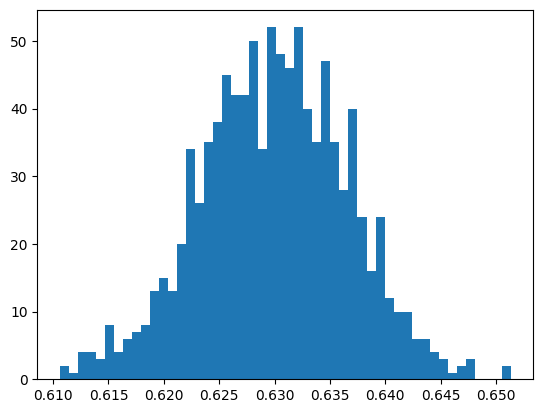

In [ ]:
plt.hist(S, bins=50)

# **Acierto y Error**

In [298]:
n = 100

In [299]:
#Las puse aqui para que fueran variable globales y no repetir codigo
c =  1 #Aqui le di el valor de 1 a la constante por que es el maximo de la funcion
a = 0 #limite inferior
b = 1 #limite superior

In [300]:
def estimacionae(n): #En esta funcion hacemos la generacion de (u_i, u_n+1)
  lista1 = []
  lista2 = []
  for i in range(1, 2*n):#Aqui hacemos el rango de 1 a la 2n como dice el algoritmo
                        #Como debemos hacerlo en pareja, lo dividi en lista de pares e impares
    u = rnd.random()#y a cada elemento de la lista1 inice i le correspondera su pareja
    if i % 2 == 1:# de la lista 2 con el mismo indice i
      lista1.append(u)
    else:
      lista2.append(u)
  return lista1, lista2



In [301]:
Z = estimacionae(n) #Aqui imprimimos y lo hacemos de manera global para facilitar las cosas más adelante


In [302]:
def evalx(n): #En esta funcion haremos los respectivos x para evaluar en g(x_i)
  listaxi = []
  for j in Z[0]:#Z[0] es porque en la primera funcion se genero una lista de dos listas
    x = a + j*(b-a)# y necesitamos la lista de indices impares que correponde a los u_i
    listaxi.append(x)
  return listaxi

In [303]:
def evalgx_i(n): #En esta funcion evaluamos los x de la anterior funcion en nuestra funcion raiz(arctan(x))
  g = evalx(n) # Se llama a la funcion anterior
  listagxi = []
  for k in g:
    g_xi = np.sqrt(np.arctan(k))
    listagxi.append(g_xi)
  return listagxi


In [304]:
def eval_na(n): #Aqui esta funcion hace la comparacion entre los g(x_i)y los u_n+i
  p = evalgx_i(n) #Llamamos a la funcion anterior que nos regresara una lista de los x_i evaluados en g(x)
  contador = 0
  for valorp, valorz in zip(p, Z[1]): #La funcion zip itera de manera paralela n lista
    if valorp > valorz: #y aqui comparamos si cumple y le añadimos un 1 al contador
      contador += 1
  return contador

In [305]:
def calculomedmuest(n): #Esta funcion es para el calculo de los I
  M = eval_na(n)
  listaI = []
  for d in range(1,n):
    I = c*(b-a)*(M/d)
    listaI.append(I)
  return listaI[-1]

In [306]:
def simulacion1(M): #Esta es para el histograma
  calculomedmuest(n)
  r = []
  for i in range(M):
    R = calculomedmuest(n)
    r.append(R)
  return r

In [307]:
Q = simulacion1(500)

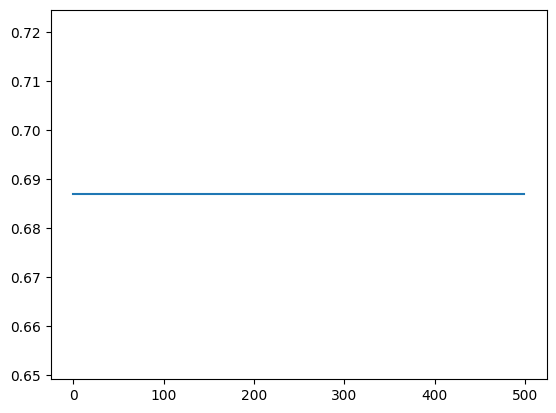

In [308]:
plt.plot(Q)

(array([  0.,   0.,   0.,   0.,   0., 500.,   0.,   0.,   0.,   0.]),
 array([0.18686869, 0.28686869, 0.38686869, 0.48686869, 0.58686869,
        0.68686869, 0.78686869, 0.88686869, 0.98686869, 1.08686869,
        1.18686869]),
 <BarContainer object of 10 artists>)

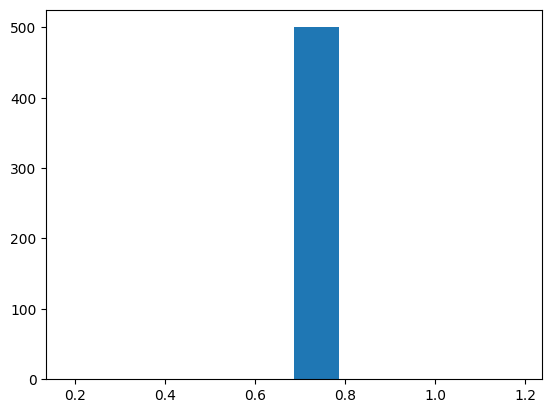

In [309]:
plt.hist(Q)

Profesor ahí lo logre hacer, no me salio el histograma para el metodo de acierto y error y no me dio tiempo de hacer el intervalo de confianza
